### Library Declaration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AIML/Machine learning with Python/7 -  Supervised Learning - I/Boston_dataset.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


### Exploratory data analysis

In [ ]:
def plot_scatter(df, cols):
    plt.figure(figsize=(20, 20))
    plt.suptitle('Independent vs Dependent Features')
    for loc, col in enumerate(cols):
        plt.subplot(4, 4, loc+1)
        plt.scatter(df[col], df['MV'])
        plt.xlabel(f'{col}')
        plt.ylabel('MV')
    return None

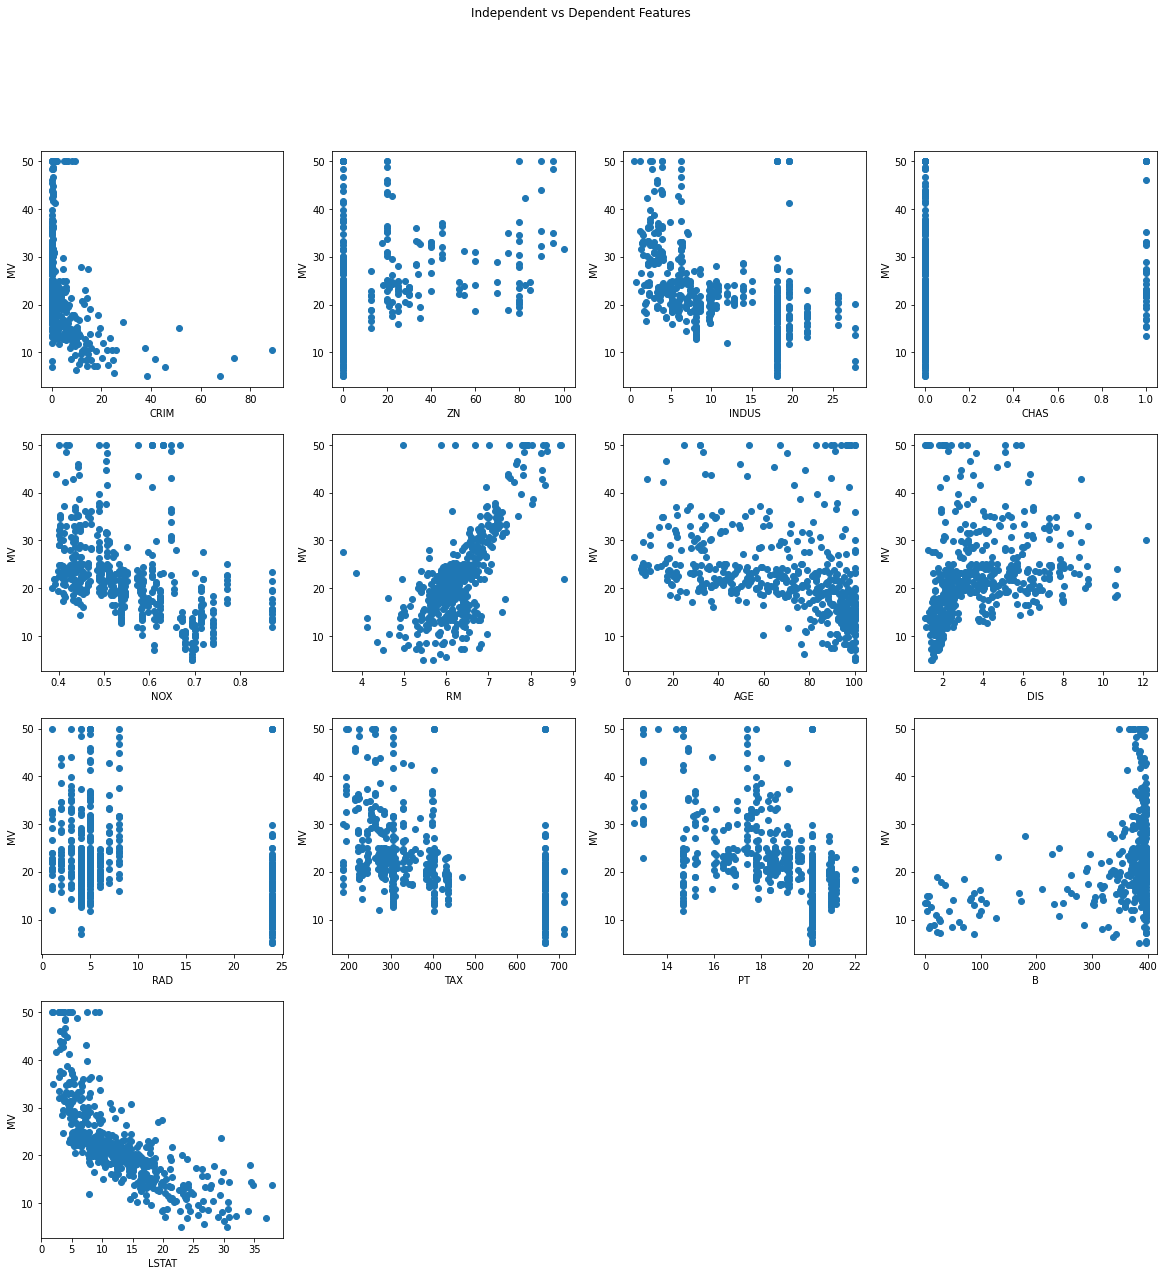

In [ ]:
plot_scatter(data, data.columns[:-1])
plt.show()
plt.close()

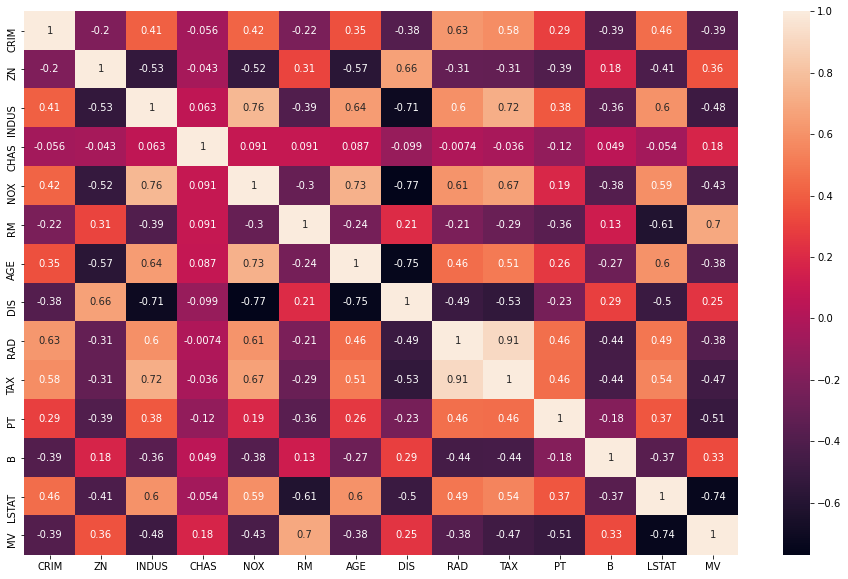

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Splitting Dataset

In [ ]:
features = data.drop(['MV'], axis=1)
target = data['MV']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape)

(354, 13)


### Model Training

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.intercept_, lr_model.coef_)

31.631087011922588 [-1.33470111e-01  3.58089136e-02  4.95227006e-02  3.11983509e+00
 -1.54170644e+01  4.05719893e+00 -1.08208344e-02 -1.38599817e+00
  2.42727390e-01 -8.70223437e-03 -9.10685209e-01  1.17941160e-02
 -5.47113335e-01]


In [ ]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

print(f"Training error: {sqrt(mean_squared_error(y_train, train_pred)):.3f}")
print(f"Testing error: {sqrt(mean_squared_error(y_test, test_pred)):.3f}")

Training error: 4.748
Testing error: 4.639


In [ ]:
y_test

173    23.600000
274    32.400002
491    13.600000
72     22.799999
452    16.100000
         ...    
441    17.100000
23     14.500000
225    50.000000
433    14.300000
447    12.600000
Name: MV, Length: 152, dtype: float64

In [ ]:
test_pred

array([28.64895916, 36.49501322, 15.41119213, 25.40321346, 18.85527915,
       23.14668859, 17.39212432, 14.07859719, 23.0369279 , 20.59943284,
       24.8228625 , 18.53057127, -6.86543563, 21.80172245, 19.22571286,
       26.19191966, 20.27734033,  5.61596472, 40.44888032, 17.57695927,
       27.44319008, 30.17159598, 10.94055784, 24.02083048, 18.07693849,
       15.93474908, 23.1261401 , 14.56052242, 22.33482536, 19.3257627 ,
       22.16564963, 25.19476114, 25.31372524, 18.51345102, 16.62232872,
       17.50268528, 30.94992974, 20.19201676, 23.90440487, 24.86975443,
       13.93767808, 31.82504713, 42.56978939, 17.62323799, 27.01963199,
       17.19006543, 13.80594079, 26.10356508, 20.31516055, 30.08649429,
       21.31240509, 34.15739626, 15.60445085, 26.1124767 , 39.31613505,
       22.99282047, 18.95764683, 33.05555606, 24.85114219, 12.91729492,
       22.68101458, 30.8033639 , 31.63522097, 16.29833681, 21.07380042,
       16.57699602, 20.36362023, 26.15615941, 31.06833003, 11.98

In [ ]:
lr_model.score(X_test, y_test)

0.7112260293950723

In [ ]:
lr_model.score(X_train, y_train)

0.743499746392758